In [1]:
#GetOldTweets package from Jefferson-Henrique
#importing the got module

#find the location of site-packages
import site
print site.getsitepackages()

#copy-paste "got" folder from the github link to this location of site-packages
#https://github.com/Jefferson-Henrique/GetOldTweets-python.git
import got

['C:\\Users\\garga\\Anaconda3\\envs\\py27', 'C:\\Users\\garga\\Anaconda3\\envs\\py27\\lib\\site-packages']


In [3]:
words_A = ['WhyIDidntReport', 'Christine', 'Blasey']  #Anisha
words_B = ['BrettKavanaugh','KavanaughHearings','Kavanaugh'] #Kirti
words_C = ['KavanaughVote','ConfirmKavanaughNow','ConfimKavanaugh'] #Catherine
words_D = ['StopKavanaugh','BelieveSurvivors','kavaNO'] #Cuiting
words_E = ['IStandWithChristineBlaseyFord','CancelKavanaugh','JusticeKavanaugh'] #Lining

words = ['WhyIDidntReport','BrettKavanaugh','KavanaughHearings', 'Christine', 'Blasey', 'KavanaughVote','Kavanaugh',\
         'ConfirmKavanaughNow','ConfimKavanaugh','StopKavanaugh','BelieveSurvivors','kavaNO',\
          'IStandWithChristineBlaseyFord','CancelKavanaugh','JusticeKavanaugh']
         
words1 = ['BrettKavanaugh','KavanaughHearings','Kavanaugh','KavanaughVote','ConfirmKavanaughNow','ConfimKavanaugh','JusticeKavanaugh']

dates = ['2018-09-16','2018-09-17','2018-09-18','2018-09-19','2018-09-20','2018-09-21','2018-09-22','2018-09-23','2018-09-24',\
         '2018-09-25','2018-09-26','2018-09-27','2018-09-28','2018-09-29','2018-09-30','2018-10-01','2018-10-02','2018-10-03']

dates1 = ['2018-07-09','2018-07-10','2018-07-11','2018-07-12','2018-07-13','2018-07-14','2018-07-15','2018-07-16','2018-07-17']

tweet = []

#####################################################################
'''change words_A to appropriate list for your name'''
#####################################################################
for word in words1:
    print word
    for (i,d) in enumerate(dates1[:-1]):
        print i
        tweetCriteria = got.manager.TweetCriteria().setQuerySearch(word).setSince(d).setUntil(dates1[i+1]).setMaxTweets(max(0,1000))
        tweet.append(got.manager.TweetManager.getTweets(tweetCriteria))
        
tweet = [j for sub in tweet for j in sub]

BrettKavanaugh
0
1
2
3
4
5
6
7
KavanaughHearings
0
1
2
3
4
5
6
7
Kavanaugh
0
1
2
3
4
5
6
7
KavanaughVote
0
1
2
3
4
5
6
7
ConfirmKavanaughNow
0
1
2
3
4
5
6
7
ConfimKavanaugh
0
1
2
3
4
5
6
7
JusticeKavanaugh
0
1
2
3
4
5
6
7


In [4]:
import pandas as pd
#extract information on tweets, hashtags, dates etc from the filtered tweets search
tweets = pd.Series([t.text for t in tweet])
hashtags =pd.Series([t.hashtags for t in tweet])
user_id = pd.Series([t.id for t in tweet])
user_name = pd.Series([t.username for t in tweet])
tweet_date = pd.Series([t.date for t in tweet])
location = pd.Series([t.geo for t in tweet])

#combine all attributed of a tweet into a dataframe
tweets_data = pd.DataFrame(pd.concat([tweets,hashtags,user_id,user_name,tweet_date,location],axis = 1))
tweets_data.columns = ['tweets','hashtag','user_id','user_name','date','location']

In [6]:
tweets_data.to_csv(r'C:\Users\garga\Desktop\Text Analytics\Project\Data\tweets_july.csv', encoding = 'utf-8')

In [35]:
import pandas as pd
tweets_A = pd.read_csv(r'C:\Users\garga\Desktop\Text Analytics\Project\Data\tweets_words_A.csv', encoding = 'utf8')
tweets_B = pd.read_csv(r'C:\Users\garga\Desktop\Text Analytics\Project\Data\tweets_words_B.csv', encoding = 'utf8')
tweets_C = pd.read_csv(r'C:\Users\garga\Desktop\Text Analytics\Project\Data\tweets_words_C.csv', encoding = 'utf8')
tweets_D = pd.read_csv(r'C:\Users\garga\Desktop\Text Analytics\Project\Data\tweets_words_D.csv', encoding = 'utf8')
tweets_E = pd.read_csv(r'C:\Users\garga\Desktop\Text Analytics\Project\Data\tweets_words_E.csv', encoding = 'utf8')
tweets_July = pd.read_csv(r'C:\Users\garga\Desktop\Text Analytics\Project\Data\tweets_july.csv', encoding = 'utf8')


tweets_all = tweets_A.append(tweets_B).append(tweets_C).append(tweets_D).append(tweets_E) #append all tweets together
tweets_all = tweets_all.iloc[:,1:-1].drop_duplicates() #same tweets retreived while searching for different hashtags
tweets_all = tweets_all[~tweets_all['tweets'].isnull()] #166 null tweets
len(tweets_all)

188186

Populating the interactive namespace from numpy and matplotlib


10    3221
14    3157
9     3104
15    3094
11    3067
16    3037
12    3019
13    3008
8       37
Name: date, dtype: int64

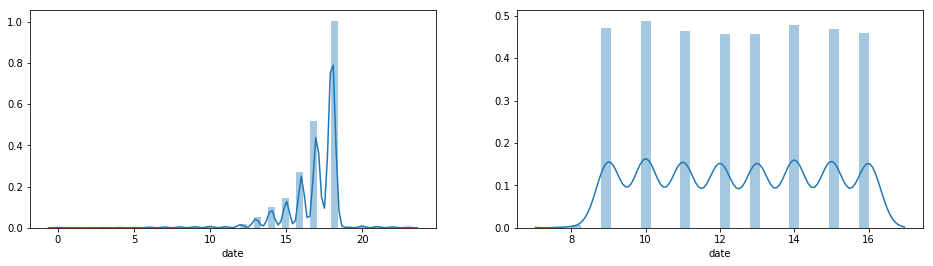

In [9]:
#check for the time distribution of tweets retrieved
import datetime
tweets_data['date'] = tweets_data['date'].apply(lambda x: pd.to_datetime(x))
hours = tweets_data['date'].apply(lambda x: x.hour)
date_tw = tweets_data['date'].apply(lambda x: x.day)

import seaborn as sns
%pylab inline
fig, (ax1, ax2) = subplots(nrows=1,ncols=2,figsize=(16, 4))
sns.distplot(hours, ax = ax1)
sns.distplot(date_tw, ax = ax2)

date_tw.value_counts()

In [112]:
#check for the time distribution of tweets retrieved
import datetime
tweets_all['date'] = tweets_all['date'].apply(lambda x: pd.to_datetime(x))
tweets_all['hours'] = tweets_all['date'].apply(lambda x: x.hour)
tweets_all['date_tw'] = tweets_all['date'].apply(lambda x: x.date())
tweets_all['day'] = tweets_all['date'].apply(lambda x: x.day)

Populating the interactive namespace from numpy and matplotlib


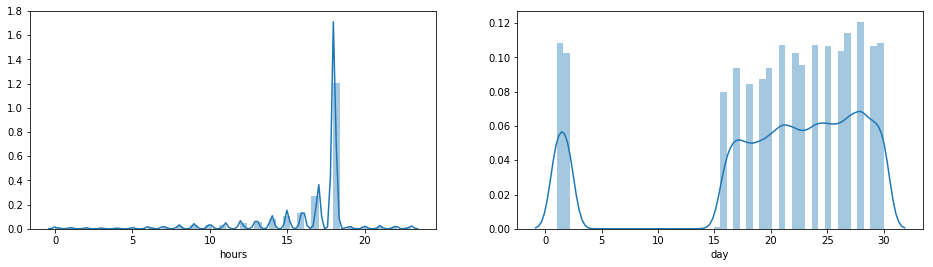

In [113]:
import seaborn as sns
%pylab inline
fig, (ax1, ax2) = subplots(nrows=1,ncols=2,figsize=(16, 4))
sns.distplot(tweets_all['hours'], ax = ax1)
sns.distplot(tweets_all['day'], ax = ax2)

In [36]:
#making a list of all hashtags
tweets_all['hashtag'] = np.where(tweets_all['hashtag'].isnull(), 'missing', tweets_all['hashtag'])
tweets_all['hashtag'] = tweets_all['hashtag'].apply(lambda x: x.split('#')[1:])   

import re
#remove retweets
tweets_all['tweets'] = tweets_all['tweets'].apply(lambda x: ''.join(re.sub('https?://.*','',x)))
#remove pictures
tweets_all['tweets'] = tweets_all['tweets'].apply(lambda x: ''.join(re.sub('pic.twitter.*','',x)))

# Topic Modeling - LDA

In [22]:
# !pip install spacy
import spacy

### run in command prompt - python -m spacy download en
import en_core_web_sm
nlp = en_core_web_sm.load()

from spacy.lang.en import English
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [23]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\garga\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [123]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))
pun = ['.',',',';',':','\\','?','(',')','-','"','/','\'s','#','&','!','URL','SCREEN_NAME','...',"'"]
unicode_errors = ['n\u2019t','n\'t','\u201d','\u201c','\u2019s']

def prepare_text_for_lda(text):
    tokens = tokenize(text)
#     tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [token for token in tokens if token not in pun]
    tokens = [token for token in tokens if token not in unicode_errors]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\garga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
tweets_all['tweets_token'] = tweets_all['tweets'].apply(lambda x: prepare_text_for_lda(unicode(x)))

In [70]:
from gensim import corpora
dictionary = corpora.Dictionary(tweets_all['tweets_token'])
corpus = [dictionary.doc2bow(text) for text in tweets_all['tweets_token']]

# import pickle
# pickle.dump(corpus, open('corpus.pkl', 'wb'))
# dictionary.save('dictionary.gensim')

In [71]:
import gensim
NUM_TOPICS = 3
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
# ldamodel.save('model5.gensim')

(0, u'0.046*"cancelkavanaugh" + 0.032*"ford" + 0.030*"kavanaugh" + 0.022*"believesurvivors"')
(1, u'0.056*"kavanaugh" + 0.029*"vote" + 0.026*"\'" + 0.025*"senate"')
(2, u'0.105*"justicekavanaugh" + 0.027*"kavanaugh" + 0.020*"scotus" + 0.018*"confirmkavanaughnow"')
(3, u'0.015*"woman" + 0.014*"n\u2019t" + 0.012*"\u2019s" + 0.012*"get"')
(4, u'0.099*"cancelkavanaugh" + 0.073*"stopkavanaugh" + 0.072*"istandwithchristineblaseyford" + 0.057*"kavano"')


In [83]:
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, u'0.046*"cancelkavanaugh" + 0.032*"ford" + 0.030*"kavanaugh" + 0.022*"believesurvivors" + 0.022*"sexual"')
(1, u'0.056*"kavanaugh" + 0.029*"vote" + 0.026*"\'" + 0.025*"senate" + 0.018*"brett"')
(2, u'0.105*"justicekavanaugh" + 0.027*"kavanaugh" + 0.020*"scotus" + 0.018*"confirmkavanaughnow" + 0.017*"court"')
(3, u'0.015*"woman" + 0.014*"n\u2019t" + 0.012*"\u2019s" + 0.012*"get" + 0.011*"..."')
(4, u'0.099*"cancelkavanaugh" + 0.073*"stopkavanaugh" + 0.072*"istandwithchristineblaseyford" + 0.057*"kavano" + 0.028*"metoo"')


In [86]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
# pyLDAvis.display(lda_display)
pyLDAvis.save_html(lda_display, 'lda.html')

# Saliency: a measure of how much the term tells you about the topic.
# Relevance: a weighted average of the probability of the word given the topic and the word given the topic normalized by the probability of the topic.

# LDA for different dates

In [ ]:
import gensim
from gensim import corpora
import pyLDAvis.gensim

NUM_TOPICS = 2

for d in dates[:-1]:
    d = pd.to_datetime(d).date()
    tweets_d = tweets_all[tweets_all['date_tw'] == d]['tweets'].apply(lambda x: prepare_text_for_lda(unicode(x)))
    dictionary = corpora.Dictionary(tweets_d)
    corpus = [dictionary.doc2bow(text) for text in tweets_d]
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
    topics = ldamodel.print_topics(num_words=4)
    print (d)
    for topic in topics:
        print(topic)
    
    lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
    pyLDAvis.save_html(lda_display, 'LDAviz//da_2Topics_{}.html'.format(d))




# Senator Joe Manchin

In [144]:
tweet = []
tweetCriteria = got.manager.TweetCriteria().setSince('2018-09-16').setUntil('2018-10-03').setUsername('Sen_JoeManchin')
tweet = got.manager.TweetManager.getTweets(tweetCriteria)

tweets = pd.Series([t.text for t in tweet])
hashtags =pd.Series([t.hashtags for t in tweet])
user_id = pd.Series([t.id for t in tweet])
user_name = pd.Series([t.username for t in tweet])
tweet_date = pd.Series([t.date for t in tweet])
location = pd.Series([t.geo for t in tweet])

#combine all attributed of a tweet into a dataframe
tweets_data = pd.DataFrame(pd.concat([tweets,hashtags,user_id,user_name,tweet_date,location],axis = 1))
tweets_data.columns = ['tweets','hashtag','user_id','user_name','date','location']

In [146]:
tweets_data

,tweets,hashtag,user_id,user_name,date,location
0,I'm thrilled the Senate Energy & Natural Resou...,#WV #LWCF,1047166201099636736,Sen_JoeManchin,2018-10-02 11:47:32,
1,Happy 95th birthday to my good friend and West...,,1047143025326116864,Sen_JoeManchin,2018-10-02 10:15:26,
2,Last week I visited the traveling replica of t...,,1047135657775251456,Sen_JoeManchin,2018-10-02 09:46:10,
3,I'm excited to announce more than $5.5 million...,,1046781864856473601,Sen_JoeManchin,2018-10-01 10:20:19,
4,I applaud Senator Flake's decision to rise abo...,,1045747647968153600,Sen_JoeManchin,2018-09-28 13:50:42,
5,Today I visited with job seekers in Parkersbur...,,1045736991747461120,Sen_JoeManchin,2018-09-28 13:08:22,
6,All week the @MineWorkers have been meeting wi...,,1045355836879589376,Sen_JoeManchin,2018-09-27 11:53:47,
7,Today @SenDeanHeller & I sent a bipartisan let...,#WV,1045313462962974722,Sen_JoeManchin,2018-09-27 09:05:25,
8,I had the privilege to meet with Trent & Melis...,#WV,1044934621337710593,Sen_JoeManchin,2018-09-26 08:00:02,
9,This afternoon I met with members of the Ameri...,,1044706454576484353,Sen_JoeManchin,2018-09-25 16:53:23,
